# Math 104C Homework 5
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
#### (a)
We can simplify the forward-time forward-space scheme to 
$$v_j^{n+1} = -\lambda \left(v_{j+1}^n - v_j^n\right)+v_j^n$$
Here we have $\lambda = 0.8, h = 0.02, k = 0.016$, refer to cell below for numerical demonstration. After analyzing the plots, we can see that initial condition i is significantly more unstable than initial condition ii because we can already see instability occuring at time step 5 where as in initial condition ii, there is only slight instability occuring at time step 35.

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

In [46]:
#code for 1a

#initial function i, non smooth
def func1(x):
    if np.abs(x)<=1:
        return 1-np.abs(x)
    return 0

#initial function ii, smooth 
def func2(x):
    return np.exp(-5*x**2)

def FTFSWave(L1, L2, M, N, Lam, f):
    """
    l1 = where x starts
    l2 = where x stops 
    n  = time step size
    m  = mesh size 
    f  = initial function 
    """
    x        = np.linspace(L1, L2, M)
    initial  = np.zeros(M)
    
    for i in range(0, M):
        initial[i] = f(x[i])
        
    size     = (N, M)    
    A        = np.zeros(size)
    A[0]     = initial
    A[0][-1] = A[0][-2]
    
    for i in range(N-1):
        for j in range(M-1):
            A[i+1][j] = -Lam * (A[i][j+1] - A[i][j]) + A[i][j]
        A[i+1][-1] = A[i+1][-2]   
    return x, A

[ 0  5 10 15 20 25 30 35]
------------Plot #1 using initial function i (unstable)------------


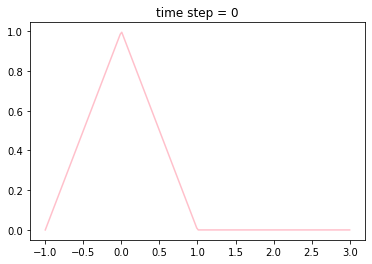

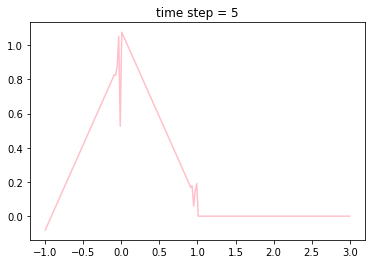

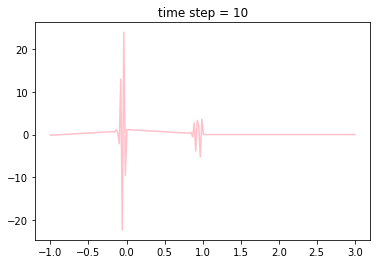

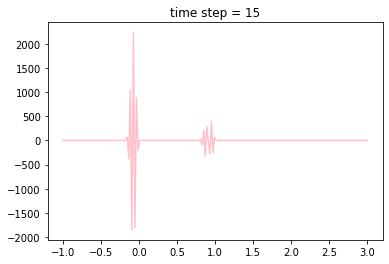

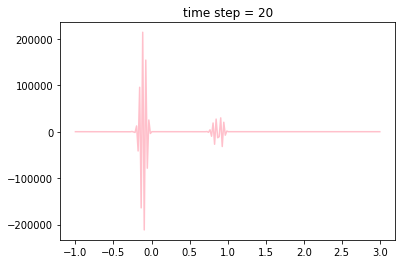

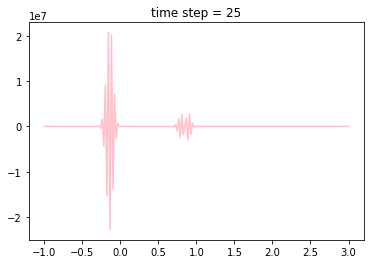

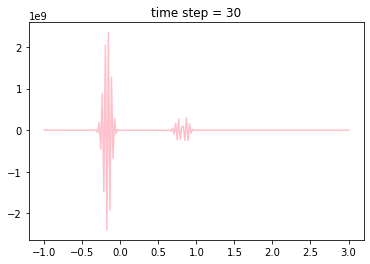

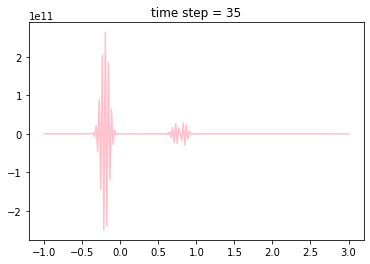

------------Plot #2 using initial function ii (stable)------------


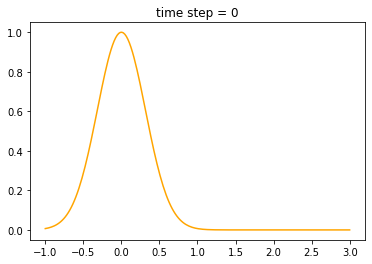

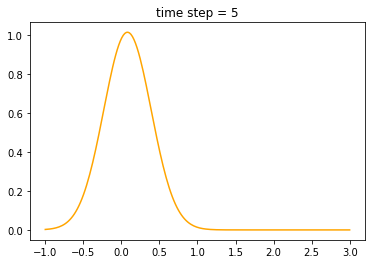

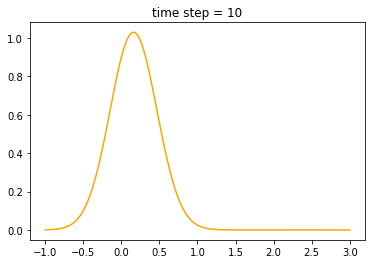

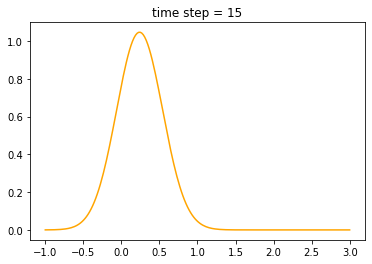

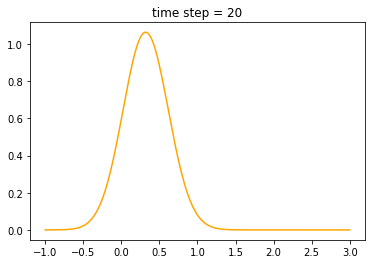

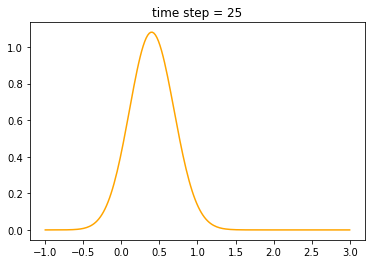

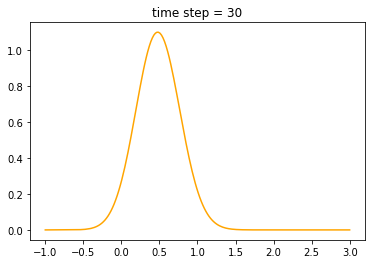

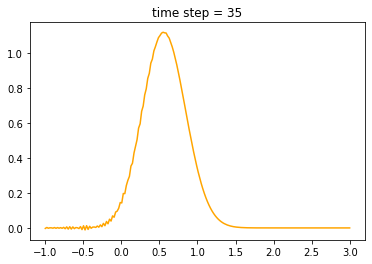

In [47]:
#plots for 1a
x1, A1 = FTFSWave(-1, 3, 200, 40, 0.8, func1)
x2, A2 = FTFSWave(-1, 3, 200, 40, 0.8, func2)

tstep = np.arange(0, 40, 5)
print(tstep)

print("------------Plot #1 using initial function i (unstable)------------")
for i in tstep:
    plt.plot(x1, A1[i], color="pink")
    plt.title("time step = %s" %i)
    plt.show()

print("------------Plot #2 using initial function ii (stable)------------")
for i in tstep:
    plt.plot(x2, A2[i], color='orange')
    plt.title("time step = %s" %i)
    plt.show()

#### (b)

For our initial condition 1, the instability is primarily localized where there does not exist any derivatives. By the construct of our step size, we may be skipping over the nondifferentiable points. In contrast, the smooth initial condition is yielding better results because the the slope of the curve is better distributed. In initial condition 1, the strongest instability happens at the peak of the wave where it is a sharp point. We do not have this linear slope conjoined with an acute point in initial condition 2 hence less instability. 

<br/><br/>

To give an estimate of the expected growth rate of the instability per time step, Von Neumann analysis should be applied as follows:
$$\begin{align}
v_j^{n+1} &= -\lambda\left(v_{j+1}^n - v_j^n\right) + v_j^n\\
u_j^{n+1} &= (1+\lambda)u_j^n - \lambda u_{j+1}^n \quad \text{where }\lambda = \alpha \frac{k}{h}\\
\end{align}$$
let $u_j^n = g^ne^{imjh}$
$$g^{n+1}e^{imjh} = (1+\lambda)g^ne^{imjh} -\lambda(g^ne^{im(j+1)h})$$
this simplifies to $g = 1 + \lambda - \lambda e^{imh}$<br/><br/>
Let $\theta = mh$, since $g \in \mathbb{C}: $
$$\begin{align}
g &= 1 +\lambda - \lambda(\cos\theta +i\sin\theta)\\ 
|g| &= \sqrt{(1+\lambda - \lambda(\cos \theta)^2 + (\lambda i\sin \theta)^2}\\
|g|^2 &= \left(1 + \lambda - \lambda\cos\theta\right)^2 +\lambda^2 \sin^2\theta\\
\end{align}$$
After expanding the square term and simplifying we have 
$$|g|^2 = 1 + 2\lambda + 2\lambda^2 -2\lambda(1+\lambda)\cos\theta$$
for $\lambda > 0$ and $\theta \neq \frac{\pi}{2}$. Apply this and we find $|g|^2 > 1 + 2\lambda + 2\lambda^2 -2(1+\lambda)\lambda) = 1$. 
<br/><br/>
Therefore for $\lambda > 0$ and $\alpha > 0$ we have $|g|>1$ and for each time step $n$, we have an approximation $g^n$ for the estimation of the growth rate per time step. 

#### (c)

The following analysis will be done using upwinding method where $h = 0.02, \lambda = \frac{k}{h} = 0.8$. Refer to cell below. 

In [48]:
#code for 1c
def UPWWave(L1, L2, M, N, Lam, f):
    """
    l1 = where x starts
    l2 = where x stops 
    n  = time step size
    m  = mesh size 
    f  = initial function 
    """
    x        = np.linspace(L1, L2, M)
    initial  = np.zeros(M)
    
    for i in range(0, M):
        initial[i] = f(x[i])
        
    size     = (N, M)    
    A        = np.zeros(size)
    A[0]     = initial
    A[0][0]  = 0
    
    for i in range(N-1):
        for j in range(0, M):
            A[i+1][j] = -Lam * (A[i][j] - A[i][j-1]) + A[i][j]
            
    return x, A

[ 0  5 10 15 20 25 30 35]
------------Plot #1 using initial function i (unstable)------------


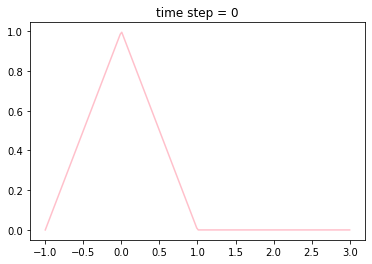

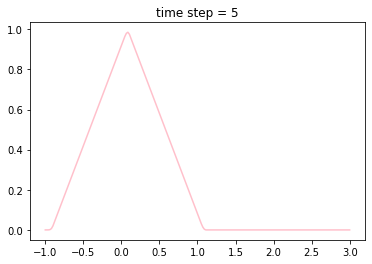

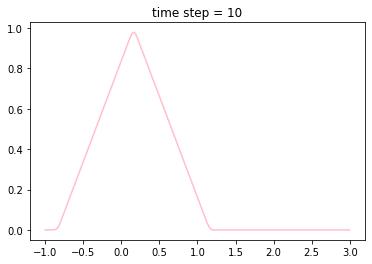

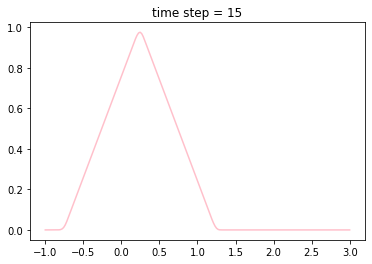

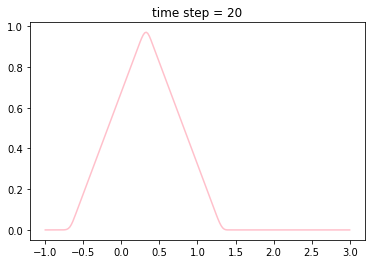

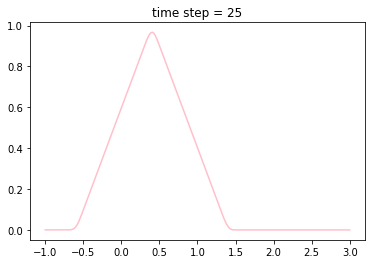

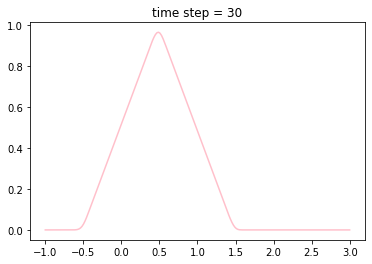

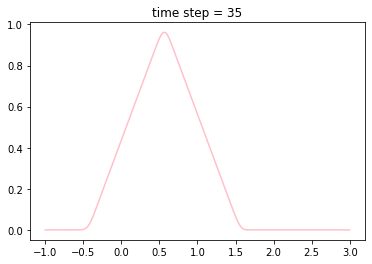

------------Plot #2 using initial function ii (stable)------------


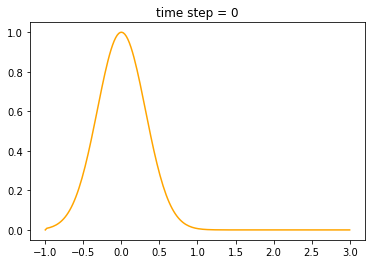

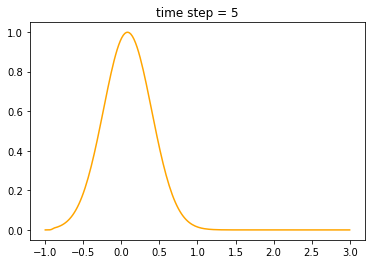

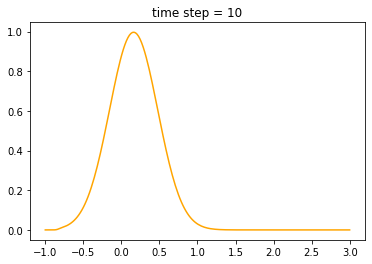

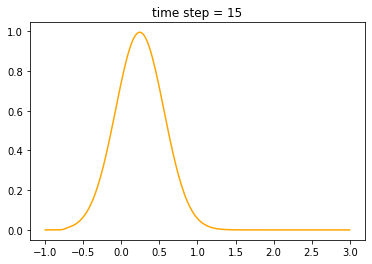

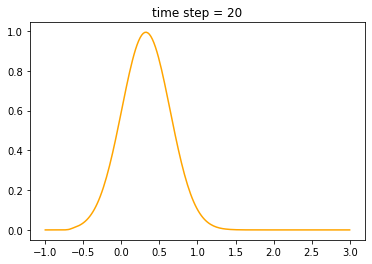

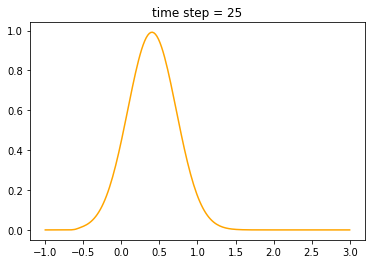

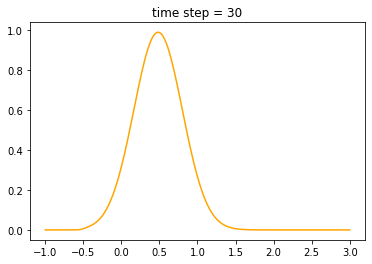

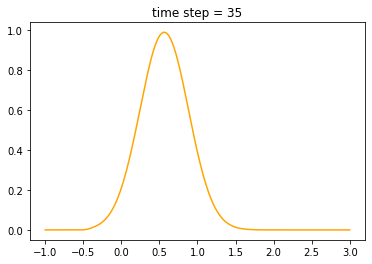

In [50]:
#plots for 1c
x1, A1 = UPWWave(-1, 3, 200, 40, 0.8, func1)
x2, A2 = UPWWave(-1, 3, 200, 40, 0.8, func2)

tstep = np.arange(0, 40, 5)
print(tstep)

print("------------Plot #1 using initial function i (unstable)------------")
for i in tstep:
    plt.plot(x1, A1[i], color="pink")
    plt.title("time step = %s" %i)
    plt.show()

print("------------Plot #2 using initial function ii (stable)------------")
for i in tstep:
    plt.plot(x2, A2[i], color='orange')
    plt.title("time step = %s" %i)
    plt.show()